# modelling validation influence diagrams for high tech systems

<a id = "table_of_content"> </a>
### table of contents
- [prerequisites](#prerequisites)
- [helpers](#helpers)
- [create diagram](#create_diagram)
- [display diagram and tables](#diagram_tables)
- [modelling and validating systems and health](#model_validate_system)
- [modelling and validating Replace Decision](#model_validate_decision)
- [modelling and validating Tests](#modelling_validating_tests)
  - [cmponent health test, LIMID](#joep_component_health_test)
  - [component health test, ID](#component_health_test_ID)
  - [improved test](#improved_test)

<a id="prerequisites"></a>
# prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output
import pandas as pd
from itertools import product
import math

In [3]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [4]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")
css_styling()

In [5]:
css_styling

<function __main__.css_styling()>

In [6]:
sys.path.insert(1, "/workspaces/ou-af/problem1/iteratie1")

In [7]:
# import de code
import src.system as system
import src.diagrambuilder as builder
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

[Back to table of content](#table_of_content)

<a id="helpers"></a>
# reporting helpers

In [8]:
def visualizeStructure(diagram):
#    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)

In [9]:
def showCPTs(diagram):
    nodes = diagram.nodes()
    for n in nodes:
        if(diagram.isChanceNode(n)):
            gnb.flow.row(diagram.cpt(n))

In [10]:
def createUtilityRow(nodelist):
    row_elements = [diagram.utility(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def createCptRow(nodelist):
    row_elements = [diagram.cpt(node) for node in nodelist]
    gnb.flow.row(*row_elements)



In [11]:
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))

In [12]:
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

[Back to table of content](#table_of_content)

<a id="create_diagram"></a>
## create diagam

In [13]:
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.testObserveHealth]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure0,
    "tests"       : tests,
    "testmapping" : testspecs.testmapping1
}

In [14]:
# read specifications, create system of objects
system = system.createSystemFromSpecs(assembly)

building system: structure1
number of components: 1
KeyError, no connections found
number of connections: 0
number of tests: 1


In [15]:
# create diagram object
diagram = gum.InfluenceDiagram()

In [16]:
diagram = builder.diagramBuilder(diagram, system)

adding component: Light
adding cpt for component: Light
adding Replace decision for component: Light
adding Replace utility for component: Light
adding test: TestObserveHealth to component: Light


In [17]:
def visualizeStructure(diagram):
#    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=200)

[Back to table of content](#table_of_content)

<a id="diagram_tables"></a>
## display diagram + tables

Influence Diagram{
  chance: 4,
  utility: 2,
  decision: 2,
  arcs: 7,
  domainSize: 96
}


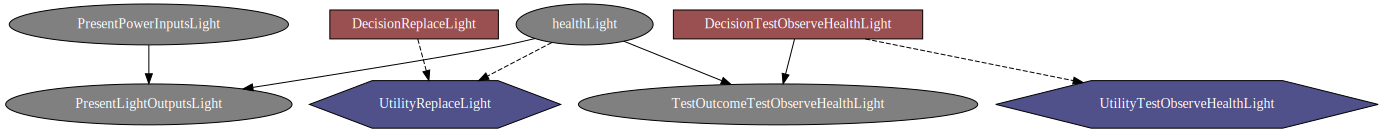

In [18]:
visualizeStructure(diagram)

In [19]:
showCPTs(diagram)

In [20]:
printUtilityTables(diagram, system)

Utility tables for component: Light


[Back to table of content](#table_of_content)

<a id="model_validate_system"></a>
## model and validate system (input > output) and health

**Scenario:** when power then light is normal behavior

- **Given:** evidence input power present: yes
- **And:** evidence light:on  
- **When:** inference performed
- **Then:** belief health should be health:ok

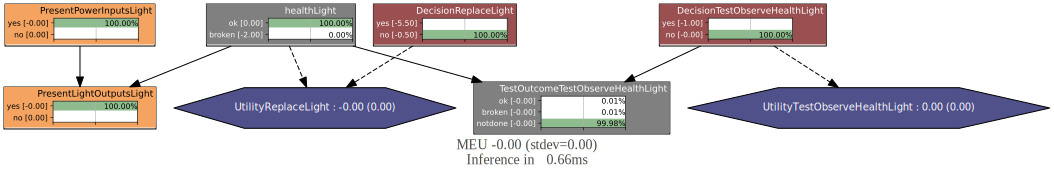

In [21]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** when no power then no light is normal behavior

- **Given:** evidence input power present: no
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health should be health:ok

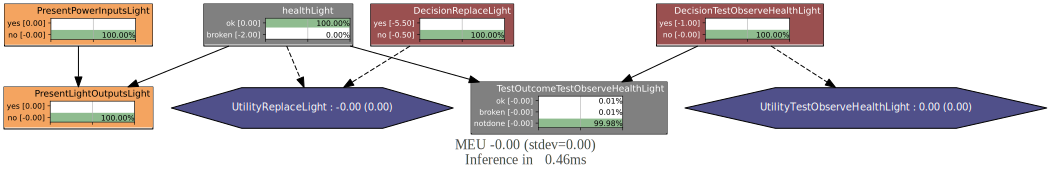

In [22]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":1,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given no light but no evidence on input power belief in health is mixed

- **Given:** no evidence input power
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health ok/broken is 50/50

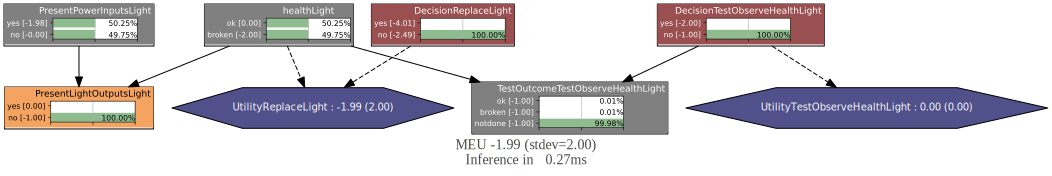

In [23]:
gnb.showInference(diagram, evs={
#    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given no light and no power on input belief health: broken, no normal behavior

- **Given:** evidence input power present: no
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health should be health:broken

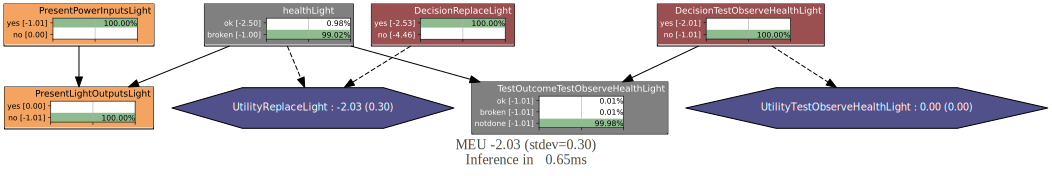

In [24]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

**Scenario:** given there is light but no power

- **Given:** evidence input power present: no
- **And:** evidence light:yes
- **When:** inference performed
- **Then:** belief health should be health:broken

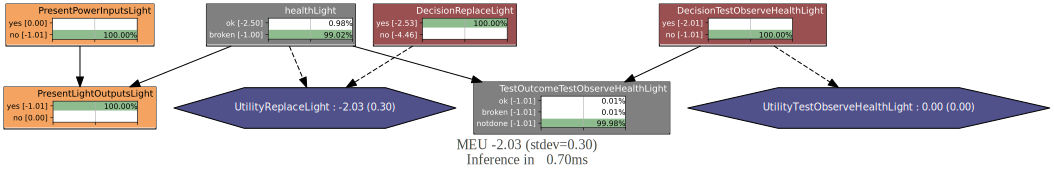

In [25]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":1,
    "PresentLightOutputsLight":0,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

The last 2 cases are due to the following table in specs for component light that defines normal behavior:

    "Behavior":{
        "normal": {
            'PresentPowerInputs':  ["yes", "no", "yes",    "no"], 
            'PresentLightOutputs': ["yes", "no", "no",    "yes"],
            'health':              ["ok",  "ok", "broken", "broken"]
            
Question: should this not be implemented via failure modes instead of normal behavior? Or can we define failure modes via this table also?

Summary system modelling and impact on health are as expected


[Back to table of content](#table_of_content)

<a id="model_validate_decision"></a>
## modelling and validating decision replace

### **Scenario:** given belief component health:broken advice to replace:yes

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:yes

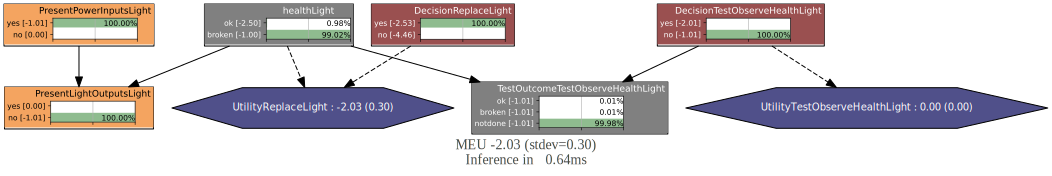

In [26]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

result follows from preferencetable for decision, when health:broken preference for replacedecision: yes (-2 > -4)

In [27]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

### berekening UtilityReplaceLight

utility belief Health + replace yes berekening: .9902 * -2 + .0098 * -5 = -2,03

utility belief health + replace no berekening: .9902 * -4 + .0098 * -0 = -3,96

### **Scenario:** changed preferences: when broken not replacing becomes preffered

In [28]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -6
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [29]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:no

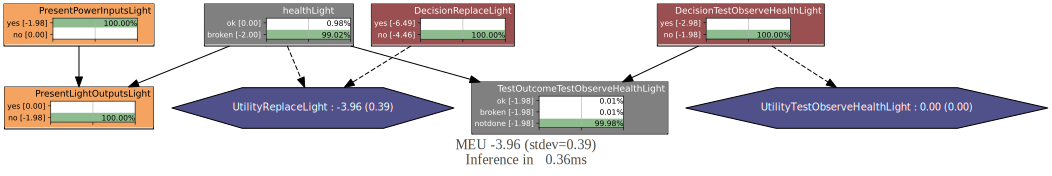

In [30]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

When system not producing output + health indicates is broken > decision to replace is no due to utility table


### **Scenario:** reset preferences if broken, replace is preferred, change utility when ok to high values and prefer no replace


In [31]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = 50000
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 100000
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [32]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:no

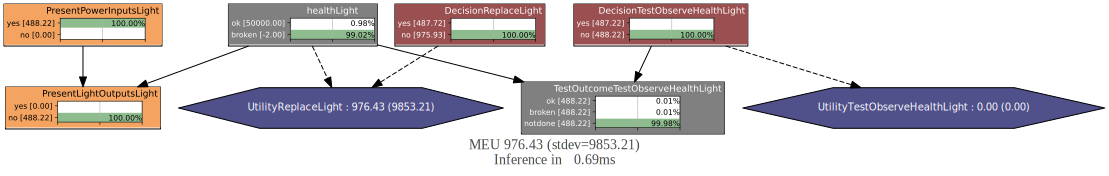

In [33]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### berekening UtilityReplaceLight

utility belief Health + replace yes berekening: .9902 * -2 + .0098 * 50000 = 488

utility belief health + replace no berekening: .9902 * -4 + .0098 * 100000 = 976,04

#### reset UtilityReplaceLight

In [34]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4

In [35]:
gnb.flow.row(diagram.utility("UtilityReplaceLight"))

summary impact of preferences and probabilities becomes clear, given very high utility decision flips even given p(0.0098)

[Back to table of content](#table_of_content)

<a id = "modelling_validating_tests"> </a>
## modelling and validating tests

Test aims to check the health of a light, simple example would be to check if wire of a light is broken. 

#### Following is taken from Joep Beurskens but edited, <a class="mycomment">comments in red</a>

##### modeling a test:
- Performing a test yields a test result that is modeled as a dummy random variable: Test, with states matching the various test results.  
<div class="mycomment"> Should test outcome be in the initial diagram or should it be introduced when test is done? Test outcome impacts health 1:1, why not use health for testoutcome?</div>
- The influence diagram includes a decision variable, T , with states (t1 = no, t2 = yes), denoting whether or not the test is suggested. 
- If the test is carried out, the outcome is made available to the decision-maker (link Testn to Dn). If, on the other hand, the test is not done, no test results are available. The link from Testn to Dn specifies that the value of Testn is known when making the corrective maintenance decision Dn.
<div class="mycomment"> Test outcome can also impact replacement decision via impact on health? Belief in health is known before replacement decision is taken?</div>
- The influence diagram also includes a utility function, U ∈ U, that specifies the cost of the test.

##### value of the test:
The test establishes the value of information according to the extent to which it might **reduce the expected costs of uncertainty by reducing uncertainty** in the evidence base. This entails evaluating the expected value of a decision made with and without additional information. When payoffs are represented in monetary terms, an explicit monetary valuation of the expected value of information is provided, which may then be directly contrasted against the expected cost of information to evaluate if it is valuable. 
<div class="mycomment">Decision to test is not due to uncertainty but due to value of information? Why not connect health to test decision? This way would reflect the need to test when belief in health is lowered?</div>
<div class="img"><img src="pictures/afbeelding1.png" align="left" width="1000" height="600"></div>

##### alternatives modelling the not done state:
The link from Testn to Dn specifies that the value of Testn is known when making the corrective maintenance decision Dn. This cannot, however, be the case when the test is not performed. According to Kjærulff and Madsen (2008), there are two alternative options to correctly model the test result variable to behave as expected when the test is not performed. Both options consider the specification of the conditional probability distribution (CPT) P (T estn|Hn, Tn) in different ways. Table 5.3 handles this by specifying P (T estn|Hn, Tn = no) as a uniform distribution. Table 5.4 introduced an additional not done state, such that not performing the test instantiates that state.

<div class="img"><img src="pictures/afbeelding2.png" align="left" width="1000" height="600"></div>

The second option is more semantically clear than the first one because it is self-evident that if the test is not performed, Testn should be instantiated to not done. However, by introducing the additional not done state in the Testn variable, the model’s complexity increases. For the sake of convenience, it is chosen to continue with the latter option. 

##### impact outcome of the test:
Note that there is no uncertainty when performing a test, i.e., Tn = yes → P (T estn = pos) = 1 ∨ P (T estn = neg) = 1. The assessment of the value of information is called the “expected value of perfect information” (EVPI) because it quantifies the value of acquiring perfect information about all aspects of the decision (eliminating all uncertainty). This does not have to be the case that all the uncertainty of a variable is eliminated. **However, it is assumed that all tests are perfect.**
<div class="mycomment">If tests are perfect why not impact health directly?</div>

##### other testtypes:
Up till now the set of possible tests exists out of tests that test components in isolation, as seen in Figure 5.4. However, such a test may not exist for some triggers, such as T3. 
- An additional observation can be made by measuring the voltage at the wire ends. This test is likely cheaper than checking the health of each component individually, and it might improve the reliability of the model the most. 
The network will look like Figure 5.5 if the measurement tests (T6, T7) are included but not the trigger test (T3). Measuring a voltage at the output of Iwire1 indicates that it is likely that the trigger, wire2, or lamp is broken. While measuring no voltage indicates there is probably a defect in the battery and/or wire1, plus an additional chance (prior probability) that trigger, wire2, and lamp are also broken. See Appendix A for a visualization in the software of these scenarios.

<div class="img"><img src="pictures/afbeelding3.png" align="left" width="1000" height="600"></div>

The informational links from Test6 to D2 and from Test7 to D4 in Figure 5.5 indicate that the information is only available prior to making a decision on D2 and D4. However, this information is also available for all decisions. But limiting the number of information links is the main motivation of LIMID. Its solution is computationally tractable, whereas the same decision problem could be intractable if the no-forgetting condition is assumed. It is not always obvious which informational links to include in a LIMID without affecting the policies and the expected utility of the computed policies.
These are considered the building blocks for modeling the diagnosis network and are applicable to Model 2: Quadruple Light. Figure 5.6 depicts the augmented Bayesian network to an influence diagram of the network in Figure 4.6. Hence, it is assumed that every component can be tested in isolation, except for the connecting wires. These are modeled similarly to T6 and T7 (Figure 5.5), where the voltage at each wire end can be measured.
<div class="mycomment">a different type of test is defined here?</div>

[Back to table of content](#table_of_content)

<a id="joep_component_health_test"></a>
## validating component health test

as specified in master thesis Joep Beurskens

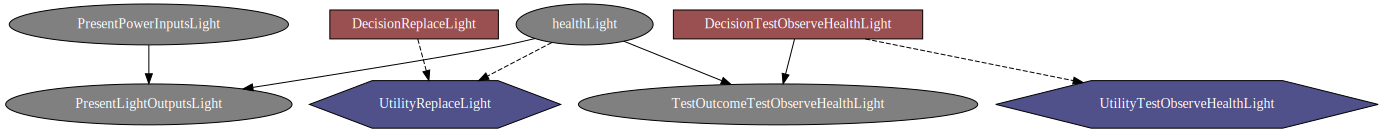

In [36]:
gnb.showInfluenceDiagram(diagram, size=1000)

Testoutcome should be made available to decisionreplacelight

In [37]:
diagram.addArc(diagram.idFromName("TestOutcomeTestObserveHealthLight"), diagram.idFromName("DecisionReplaceLight"))

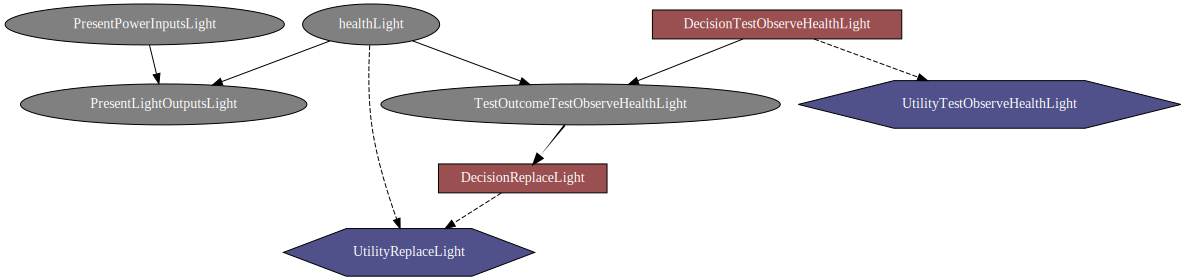

In [38]:
gnb.showInfluenceDiagram(diagram, size=1000)

### **Scenario:** given belief component health:broken, test should be triggered (but it is not!)

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** advice replace light:yes
- **And:** advice observe component should be yes

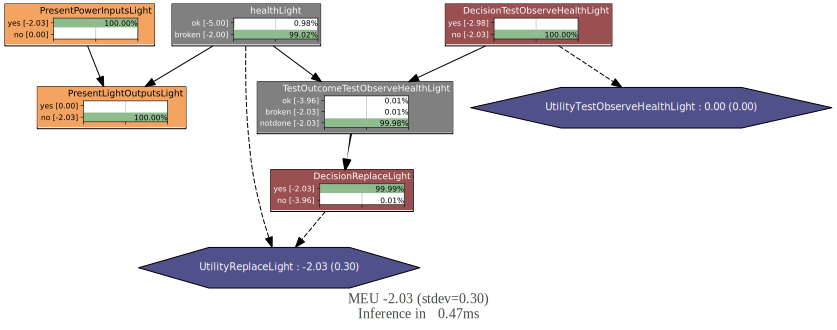

In [40]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

why is test decision:no?

In [41]:
diagram.utility("UtilityTestObserveHealthLight")

,UtilityTestObserveHealthLight
DecisionTestObserveHealthLight,0
yes,-1.0000
no,0.0000


so no is preferred, what if we flip preference?

In [42]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0] = 1  #yes
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1] = 0  #no

In [43]:
diagram.utility("UtilityTestObserveHealthLight")

,UtilityTestObserveHealthLight
DecisionTestObserveHealthLight,0
yes,1.0000
no,0.0000


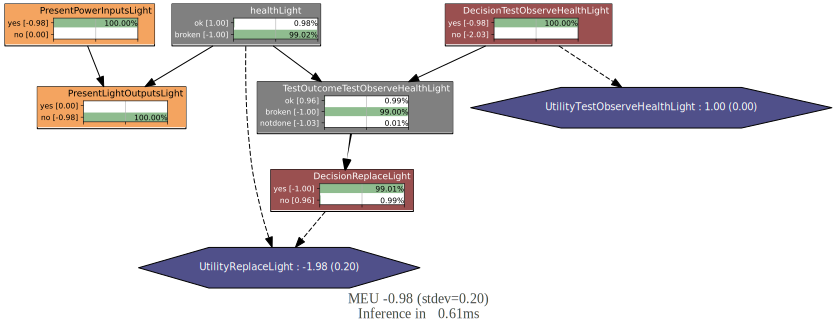

In [44]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

preferred options has flipped, next step: what is impact of TestOutcomeTestObserveHealthLight?

cpt should be set according to table 5.4  

<div class="img"><img src="pictures/table54.png" align="left" width="500" height="600"></div>

H0 is component in good condition

In [45]:
diagram.cpt(diagram.idFromName("TestOutcomeTestObserveHealthLight"))

(pyAgrum.Potential<double>@0x35728540) 
             ||  TestOutcomeTestObserveHealt|
Decisi|health||ok       |broken   |notdone  |
------|------||---------|---------|---------|
yes   |ok    || 0.9999  | 0.0001  | 0.0001  |
no    |ok    || 0.0001  | 0.0001  | 0.9999  |
yes   |broken|| 0.0001  | 0.9999  | 0.0001  |
no    |broken|| 0.0001  | 0.0001  | 0.9999  |

In [46]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0] = -1  #yes
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1] = 0   #no

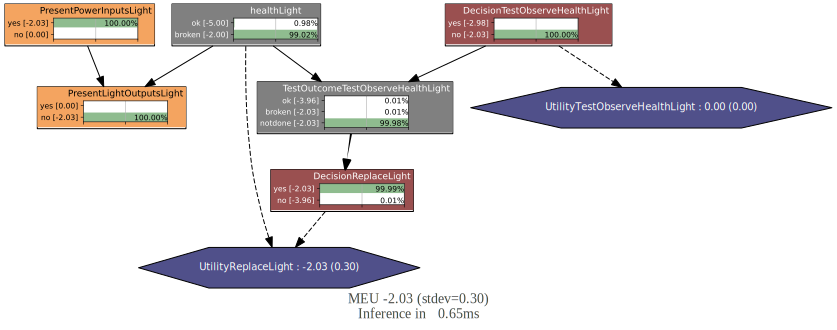

In [47]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

Observations:
- DecisionReplaceLight is not impacted by TestOutcomeTestObserveHealthLight, the arc only indicates the testoutcome is known before decision is made.
- Even though belief in health of component is broken the testoutcome states not done due to DecisionTestObserveHealthLight:no
- DecisionTestObserveHealthLight will only indicate yes if the default preference is set that way? <a class="mycomment"> How to flip the decision without changing the preference? Should health > utility or is there another way to get to yes when belief:broken?</a>

let's try increasing utility replacelight * 100

In [55]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -500
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -200
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -400

In [57]:
diagram.utility("UtilityReplaceLight")

(pyAgrum.Potential<double>@0x356bfc20) 
             ||  Utility|
Decisi|health||0        |
------|------||---------|
yes   |ok    || -500.0000|
no    |ok    || 0.0000  |
yes   |broken|| -200.0000|
no    |broken|| -400.0000|

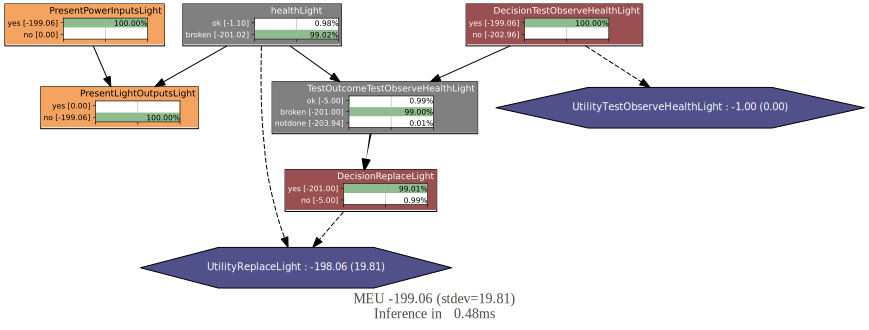

In [68]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "yes",
#    "TestOutcomeTestObserveHealthLight":0,
#   "DecisionTestObserveHealthLight": "yes",
}, size=40)

- EB(Test) = EU(Test = yes) EU(Test = no)
- MEU(testlight:yes, replace:yes) = -199,06
- MEU(testlight:no, replace:yes) = -202,94

seems to be due to 0,99% remaining chance for replace light:no + the way inference works

### **Scenario:** given normal behavior and health:OK, test should not be triggered

- **Given:** evidence input power present: yes
- **And:** evidence light:yes
- **When:** inference performed
- **Then:** belief health light:ok
- **And:** advice observe component should be no

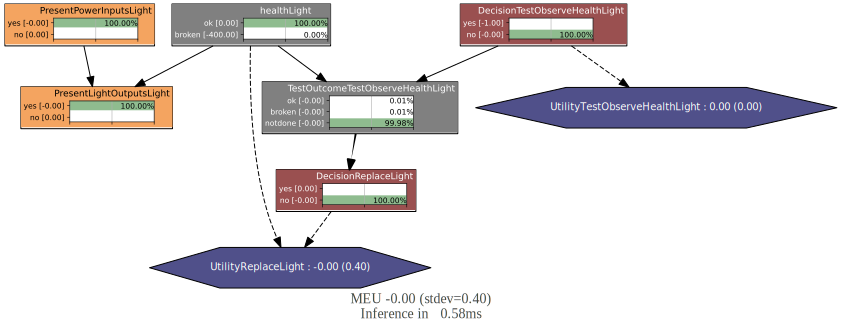

In [69]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

however test is not set to no due to health but due to preference of utility

In [70]:
diagram.utility("UtilityTestObserveHealthLight")

,UtilityTestObserveHealthLight
DecisionTestObserveHealthLight,0
yes,-1.0000
no,0.0000


### **Scenario:** given health:broken and decision to test:yes testoutcome follows health

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **And:** evidence test observehealthlight:yes
- **When:** inference performed
- **Then:** belief health light:broken
- **And:** belief testoutcome:broken

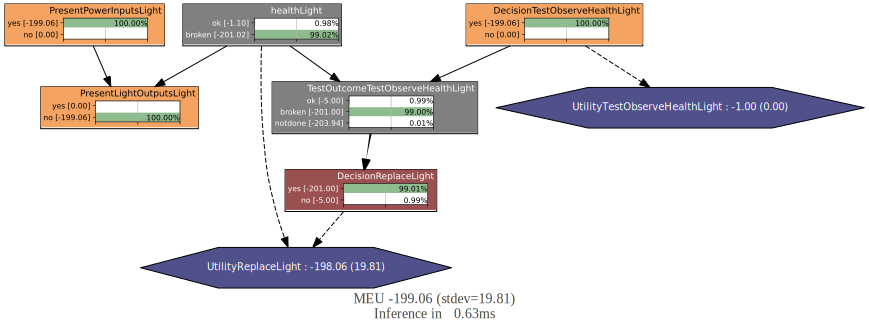

In [71]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

- **Given:** evidence input power present: yes
- **And:** evidence light:yes
- **And:** evidence test observehealthlight:yes
- **When:** inference performed
- **Then:** belief health light:ok
- **And:** belief testoutcome:ok


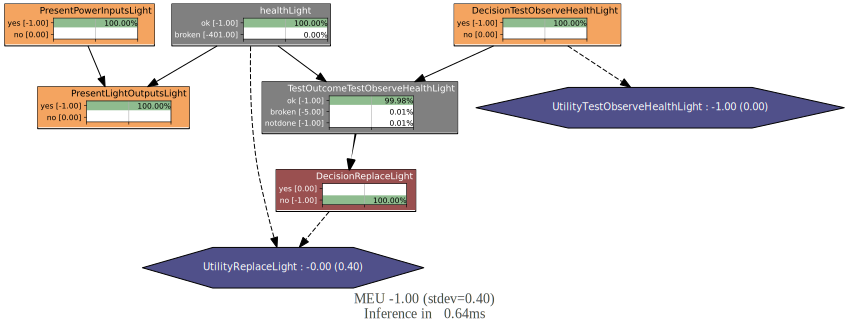

In [72]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### **Scenario:** given decision to test:yes and testoutcome: ok > belief inhealth:ok

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **And:** evidence decision test observehealthlight:yes
- **And:** evidence testoutcome:ok
- **When:** inference performed
- **Then:** belief health light:ok

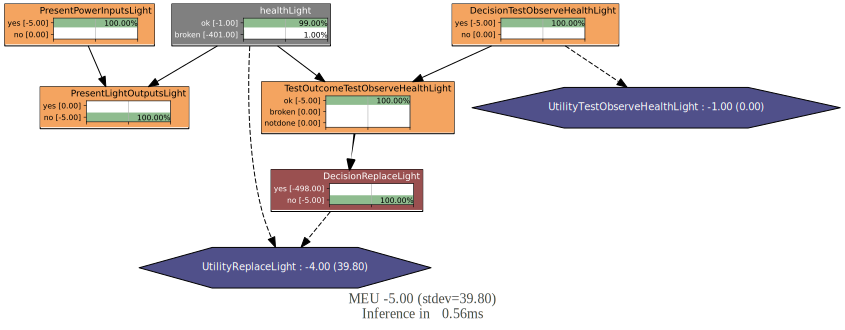

In [73]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "TestOutcomeTestObserveHealthLight":0,
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

why is evidence from the system output suggesting a broken system ignored when testoutcome indicate system is ok?

### **Scenario:** given decision to test:yes and testoutcome: broken > belief health:broken

- **Given:** evidence input power present: yes
- **And:** evidence light:no
- **And:** evidence decision test observehealthlight:yes
- **And:** evidence testoutcome:broken
- **When:** inference performed
- **Then:** belief health light:broken

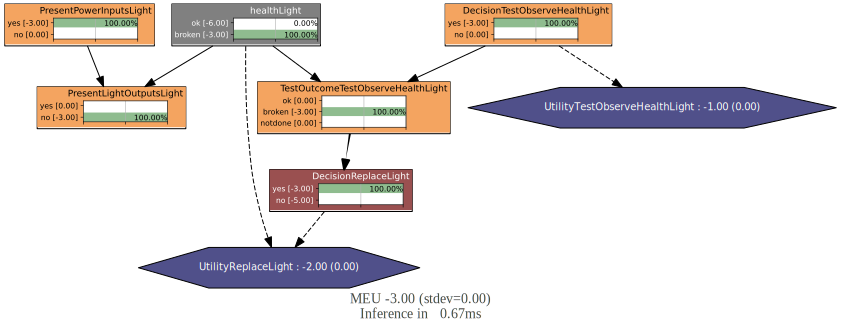

In [53]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "TestOutcomeTestObserveHealthLight":1,
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### **Scenario:** given normal behavior but decision to test:yes and testoutcome: broken > belief health:broken

- **Given:** evidence input power present: yes
- **And:** evidence light:yes
- **And:** evidence decision test observehealthlight:yes
- **And:** evidence testoutcome:broken
- **When:** inference performed
- **Then:** belief health light:broken

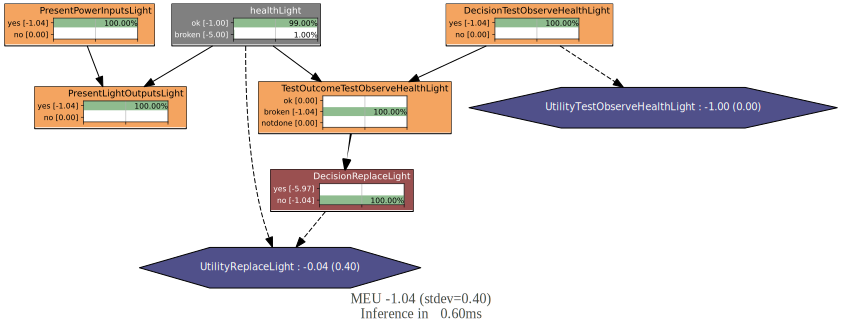

In [54]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "TestOutcomeTestObserveHealthLight":1,
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

Why does evidence from system take precedence over testoutcome when influencing healthlight?

<h3 class="mycomment">Summary</h3>

- when utility is not impacted by a chance variable uncertainty must come from other places to slip decision, a direct way should be more clear
- testoutcome only has value when decision to test is true, otherwise it is notdone > if tests are perfect it is easier to set health to ok or broken based on the result of the test.


[Back to table of content](#table_of_content)

<a id = "component_health_test_ID"> </a>
## modelling and validating component health test, ID


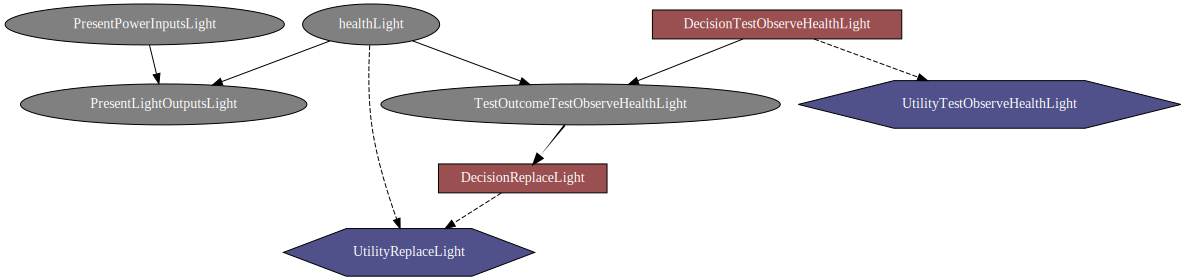

In [183]:
gnb.showInfluenceDiagram(diagram, size=200)

In [201]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -500
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -200
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -400

In [206]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0] = -10
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1] = 0

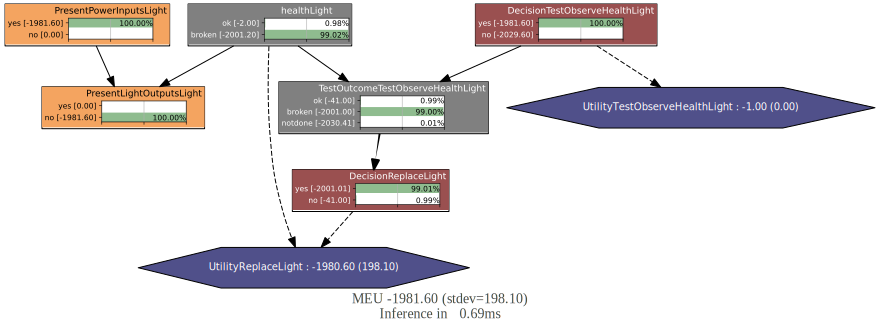

In [186]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [207]:
evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
#ie.makeInference()

In [208]:
ie.hasNoForgettingAssumption()

False

In [209]:
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))

In [210]:
ie.addNoForgettingAssumption(["DecisionTestObserveHealthLight","DecisionReplaceLight"])
#ie.addNoForgettingAssumption(["DecisionReplaceLight","DecisionTestObserveHealthLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))

In [211]:
ie.hasNoForgettingAssumption()

True

In [213]:
diagram.getDecisionGraph()

(pyAgrum.DAG@0x41270970) {3,5} , {5->3}

In [218]:
diagram.idFromName("DecisionReplaceLight")

3

In [217]:
diagram.names()

{'DecisionReplaceLight',
 'DecisionTestObserveHealthLight',
 'PresentLightOutputsLight',
 'PresentPowerInputsLight',
 'TestOutcomeTestObserveHealthLight',
 'UtilityReplaceLight',
 'UtilityTestObserveHealthLight',
 'healthLight'}

<a id="improved_test"></a>
## model and validate improved test

In [ ]:
# create diagram object
diagram = gum.InfluenceDiagram()
diagram = builder.diagramBuilder(diagram, system)
gnb.showInfluenceDiagram(diagram, size=300)

In [ ]:
diagram.eraseArc("healthLight","TestOutcomeTestObserveHealthLight")
diagram.eraseArc("DecisionTestObserveHealthLight","TestOutcomeTestObserveHealthLight")
diagram.erase(diagram.idFromName("TestOutcomeTestObserveHealthLight"))

In [ ]:
diagram.addArc("healthLight", "UtilityTestObserveHealthLight")

In [ ]:
gnb.showInfluenceDiagram(diagram, size=300)

In [ ]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,0] = -5  # health:ok, decision:yes
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,1] = 0   # health:ok, decision:no
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,0] = -2  # health:broken, decision:yes  
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,1] = -4  # health:broken, decision:no

In [ ]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))

### **Scenario:** observe test decision should behave as decision replacelight given identical utility table

four cases:
- **light working:**, after inference decision to test is no
- **light not working:**, after inference decision to test is yes
- **decision test is taken:** result health:ok, no replacing adviced
- **decision test is taken:** result health:broken, replacing adviced

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":0,
#    "healthLight":0,
#    "DecisionReplaceLight": "no",
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":0,
#    "DecisionReplaceLight": "no",
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
    "healthLight":0,
#    "DecisionReplaceLight": "no",
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

##### discussion 
- Deze structuur hebben we ook in andere literatuur teruggevonden. Maar wat voegt deze test toe? Als ik de CPT bekijk, dan zegt deze dat als bijvoorbeeld de health goed is (Hn = 0) en de test wordt gedaan (Tn=yes), dat dan de kans op een pos test 1 is. In feite is volgens deze CPT de test uitkomst een 1 op 1 "echo" van de health. 
- Het maffe is ook een beetje dat het model een decision heeft of er getest moet worden, maar dat je de uitkomst van de test niet kwijt kunt.


===================

Mijn beeld erbij is:
- Health heeft een prior die de kans aangeeft op een gezond of niet gezonde component, bijvoorbeeld 80/20
- Het testbesluit is T1 (vierkantje) en als de kosten via de utility het aangeven ga je de test doen
- Test1 is in mijn beeld de uitkomst van de test, je ziet dat ook aan de toestanden: niet gedaan, goed of niet goed
- De 1 op 1 verbinding met health duidt er denk ik op dat de test echt gericht is om de health te testen. Indien de test positief is dan zal posterior van health veranderen naar 100% positief, de onzekerheid over H is dan weg. Als de test negatief is dan is dat vervolgens ook een signaal over de health maar ook een trigger om het vervangingsbesluit te nemen: D1.

Kortom het helpt om meer zekerheid over H te krijgen en vervanging in gang te zetten (of niet).

Weet niet hoe je het ziet maar op een gegeven moment viel er bij mij een kwartje toen ik zag dat een pijl niet alleen betekent dat het onderdeel waar naar verwezen wordt verandert bij nieuwe informatie maar ook de bron van de pijl, in dit geval H.

==================

Het klopt idd wat je zegt, dat de informatie ook in tegengestelde richting van de pijlen gaat. Zoiets als, als het regent dan is de kans groot dat het seizoen herfst betreft, pijl van regen naar herfst, als we zeggen dat het herfst is dan wordt de kans dat het regent ook groter. 

Maar terug naar het Joep diagram, de "gebruiker" heeft hier alleen de beslissing dat hij/zij wel of niet de test gaat doen. Tn heeft waarde yes of no. De variabele Test1 heeft de mogelijke uitslagen van de test. De CPT tabel geeft de kansen weer dat de uitslag "not done", "pos", of "neg" zijn. Als je niet test dan is de kans 100% dat het not done is, dat lijkt me logisch.
Als je wel test en de health is 1 (health is slecht). Dan is de kans 100% dat de test negatief is en dat vind ik vreemd.
Stel de batterij health is onderdeel van een groter systeem. Daaruit volgt bijvoorbeeld dat de kans 50% is dat de batterij stuk is. Dan is de prior op dat moment 0.5/0.5 voor de batterij. Stel je geeft aan te testen, dan is de kans dat de test positief is ook 50% en de kans dat deze negatief is ook 50%.  
Kortom, op dat moment is het model nog niets verder, wel uiteraard als de test daadwerkelijk gedaan is. Maar de werkelijke uitslag van de test voegen we niet weer toe aan het model.

Naar mijn idee voegt deze CPT tabel (en dus de test niks toe). Ik ga het verder uitzoeken, kom erop terug, schrijf het ook even op om mijn idee helder te krijgen..
Het zou trouwens duidelijker zijn geweest in zo'n voorbeeld als de batterij health variabele de waarde ok en flat had i.p.v. 0 en 1. Maar dat is voor ons document.

hi Kees, 

Wil na het gedetailleerd kijken naar de "Joep" test terugkomen op een discussie die je eerder aanzwengelde. Ik heb nu het volgende gevonden met betrekking tot deze test:
- In mijn beleving bestaat er bij deze modellering geen onzekerheid over de uitvoering van de test. De test utility heeft een voorkeur die ten alle tijde geldt en geen onzekerheid kent. Die onzekerheid zou in mijn beleving van de health kunnen komen zodat bij grotere twijfel over de health het test besluit wordt getriggerd.

Dan het modelleren van de testoutcome waarbij ik verschil wil maken tussen de "belief" situatie en de "evidence" situatie, eerst de belief situatie waarbij dus geen waarde wordt gezet als evidence van de testoutcome:
- zolang de test niet wordt geadviseerd door de test decision staat de testoutcome op not done met geen effect op het geloof in de health
- als test wel wordt geadviseerd dan volgt de testoutcome het geloof van de health, dit komt door de cpt

Als je de testoutcome voorziet van bewijs dan geef je in mijn beleving de uitkomst van de test mee...
- als geloof in de health al broken was en de test geeft ook broken dan gaat geloof in health:broken naar 100%
- Ik zie dat als health ook signalen krijgt van andere variabelen die zeggen dat de situatie wel ok is dan zal een testresultaat:broken niet altijd leiden tot het geloof dat health:broken is en dus ook geen vervanging triggeren.

Op basis van dit alles denk ik dat de 1e test anders moet:
- De utility die besluit of een test moet worden uitgevoerd moet input krijgen van health zodat onzekerheid een rol gaat spelen bij het besluit een test uit te voeren.
- De testoutcome lijkt mij idd overbodig. Als een test is gedaan zou ik het resultaat als evidence meegeven aan de health. Zeker als zoals bij Joep geldt dat testen perfect zijn.

Los van deze elementen heeft Joep dan nog een link tussen de testoutcome en het vervangingsbesluit. Deze link dwingt af dat de testuitkomst eerst bekend moet zijn voordat het vervangingsbesluit kan worden genomen. Denk dat dit overbodig is aangezien health bepalend is voor vervanginsbesluit en ook al bekend voordat je vervangingsbesluit neemt.

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "DecisionTestObserveHealthLight": "yes",
}, size=40)

### **Scenario:** observe test decision should behave as decision replacelight given identical utility table

- **Given:** evidence input power present: yes
- **And:** evidence light:yes
- **And:** evidence decision test observehealthlight:yes
- **And:** evidence testoutcome:broken
- **When:** inference performed
- **Then:** belief health light:broken

## inference via code met potentials en instantions

poging om utility te berekenen

In [ ]:
evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}

In [ ]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
ie.makeInference()

In [ ]:
ie.MEU()["mean"]

In [ ]:
ie.optimalDecision('DecisionReplaceLight')

In [ ]:
ie.posterior("UtilityReplaceLight")

In [ ]:
# posterior tabel is een potential p
# loop door tabel levert een instantiation (index) i
# met index kan waarde in tabel worden opgevraagd: p.get(i)

def getOptimalDecision(ie):
    p = ie.posterior("DecisionReplaceLight")
    for i in p.loopIn():
        if (p.get(i) == 1.0):
            return i # type is Instantiation

In [ ]:
i = getOptimalDecision(ie)

In [ ]:
# get value of variable in Instantation
i["DecisionReplaceLight"]

In [ ]:
def calculateUtilityEU(ie, optDecisionI):
    h = optDecisionI.variablesSequence()[0].name()
    v = optDecisionI[h]

    pu = ie.posteriorUtility("UtilityReplaceLight")
    
    p2 = ie.posterior("UtilityReplaceLight")
    i = gum.Instantiation(p2)
    
    
# todo check of waarde wel voorkomt    
    
    while (not i.end()):
        if(i[h] == v):
            print(i)
            print(p2.get(i))
            i2 = i.copy()
        i.inc()
        
    
    

In [ ]:
calculateUtilityEU(ie, i)

In [ ]:
pu = ie.posteriorUtility("UtilityReplaceLight")
for i in pu.loopIn():
    print(i)

In [ ]:
p2 = ie.posterior("UtilityReplaceLight")

In [ ]:
i2 = gum.Instantiation(p2)

In [ ]:
a = i2.variablesSequence()

In [ ]:
if (l in a):
    print("yes")

In [ ]:
# loop potential > instantiations
# pyAgrum.Potential is a multi-dimensional array with a pyAgrum.DiscreteVariable associated to each dimension. It is used to represent probabilities and utilities tables in aGrUMs’ multidimensional (graphical) models with some conventions.
# Instantiation class which represents a multi-dimensionnal index

for t in ie.posterior("UtilityReplaceLight").loopIn():
    print(t)

In [ ]:
I = gum.Instantiation(ie.posterior("UtilityReplaceLight"))
print(I)
I.inc()
print(I)
print(ie.posterior("UtilityReplaceLight").get(I))
ie.posterior("UtilityReplaceLight").set(I, 0.1)

In [ ]:
ie.posterior("UtilityReplaceLight")


In [ ]:
l = gum.LabelizedVariable("UtilityOutput", "UtilityOutput", 1)

In [ ]:
I.chgVal("healthLight", 1)

In [ ]:
I.contains("healthLight")

In [ ]:
first = I.variable(0)
second = I.variable(1)

In [ ]:
I.nbrDim()

In [ ]:
I.val(first)

## addArc health > test utility

In [ ]:
diagram.addArc(diagram.idFromName("healthLight"), diagram.idFromName("UtilityTestObserveHealthLight"))
#diagram.eraseArc(diagram.idFromName("DecisionTestObserveHealthLight"), diagram.idFromName("TestOutcomeTestObserveHealthLight"))

In [ ]:
gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
    "TestOutcomeTestObserveHealthLight":0,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

misschien moet testoutcome altijd als evidence meegegeven worden want het is geen belief punt?

In [ ]:
printUtilityTables(diagram, system)

In [ ]:
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,0] = -5
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[0,1] = 0
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,0] = -2
diagram.utility(diagram.idFromName("UtilityTestObserveHealthLight"))[1,1] = -4

In [ ]:
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 0, 2] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[0, 1, 2] = 0.3

diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 0] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 1] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 0, 2] = 0.3
diagram.cpt('TestOutcomeTestObserveHealthLight')[1, 1, 2] = 0.3




In [ ]:
gnb.flow.row(diagram.cpt(diagram.idFromName("TestOutcomeTestObserveHealthLight")))

## add extra utility

In [ ]:
UtilityOutput=diagram.addUtilityNode(gum.LabelizedVariable("UtilityOutput", "UtilityOutput", 1))

In [ ]:
diagram.addArc(diagram.idFromName("PresentLightOutputsLight"), UtilityOutput)

In [ ]:
diagram.utility(UtilityOutput)[0] = 100 
diagram.utility(UtilityOutput)[1] = 0 

In [ ]:
# when evidence shows no light but input power present > belief health: broken

gnb.showInference(diagram, evs={
    "PresentPowerInputsLight":0,
    "PresentLightOutputsLight":1,
#    "healthLight":1,
#    "DecisionReplaceLight": "no",
#    "TestOutcomeTestObserveHealthLight":1,
#    "DecisionTestObserveHealthLight": "yes",
}, size=40)

In [ ]:
UtilityAggregate=diagram.addUtilityNode(gum.LabelizedVariable("UtilityAgg", "UtilityAgg", 1))

In [ ]:
diagram.addArc(diagram.idFromName("UtilityOutput"), diagram.idFromName("UtilityAgg"))
diagram.addArc(diagram.idFromName("UtilityReplaceLight"), diagram.idFromName("UtilityAgg"))